# EDA

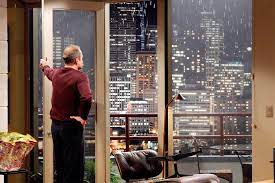

## Jennifer Montgomery
### High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year

# Initial considerations:

* What means high budget? --> over 3rd quartile
* What means show off? --> sqm lot largest vs sqm lot15, condition top
* What to do with timing?
* Waterfront = 1
* Renovated = 1
* What are high grades?
* What means reselling within a year?

In [160]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Data import

In [118]:
#import the data from a csv-file
df_eda = pd.read_csv('data/eda_marius.csv')
df_eda_backup = pd.read_csv('eda_marius_backup.csv')




### Inital exploration

In [119]:

display(df_eda.head(), df_eda.info(), df_eda.describe(), df_eda.shape)


print(df_eda['price'].describe())
plt.figure(figsize=(9, 8))
df_eda.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


None

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


(21597, 23)

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


<Figure size 900x800 with 0 Axes>

887000.0

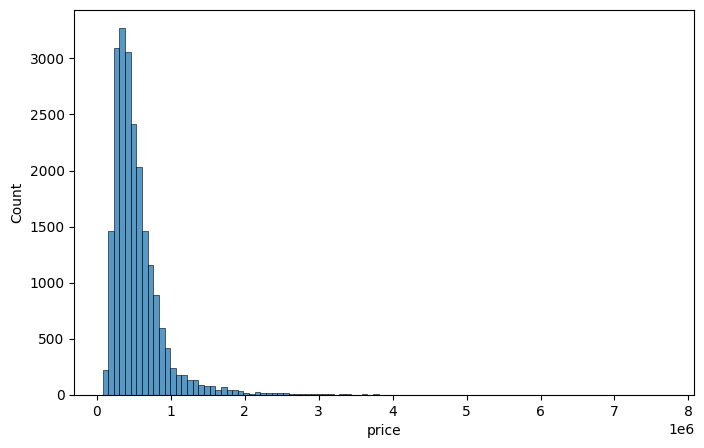

In [120]:
#price distribution
sns.histplot(data=df_eda,x='price',bins=100)
df_eda.price.median()
df_eda.price.mean()
df_eda.price.quantile(0.9)



4.0

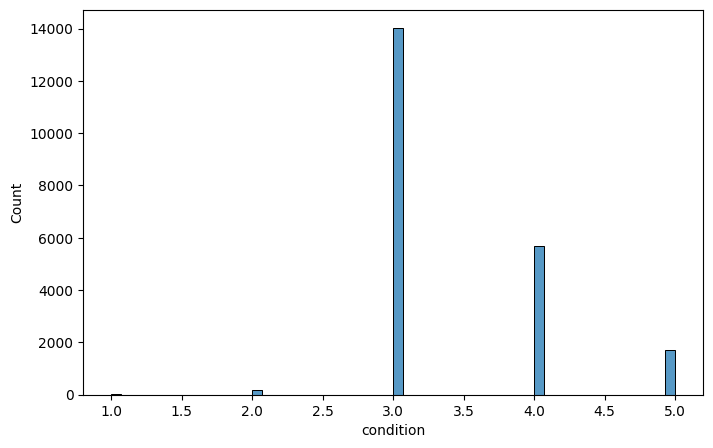

In [121]:
#condition distribution
sns.histplot(data=df_eda,x='condition')
df_eda.condition.quantile(0.9)

9.0

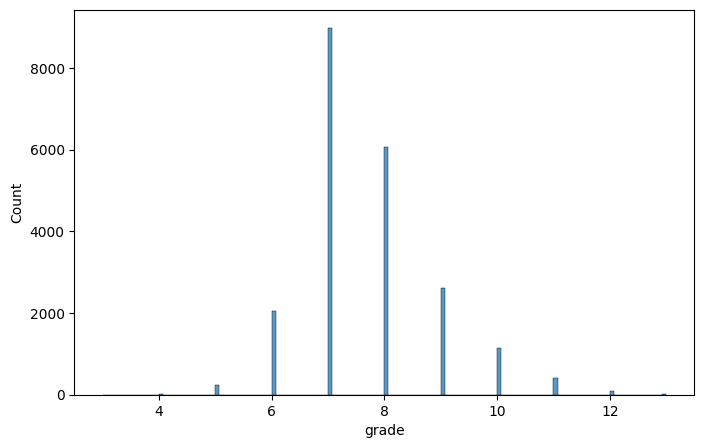

In [122]:
#grade distribution
sns.histplot(data=df_eda,x='grade',legend=4)
df_eda.grade.quantile(0.9)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

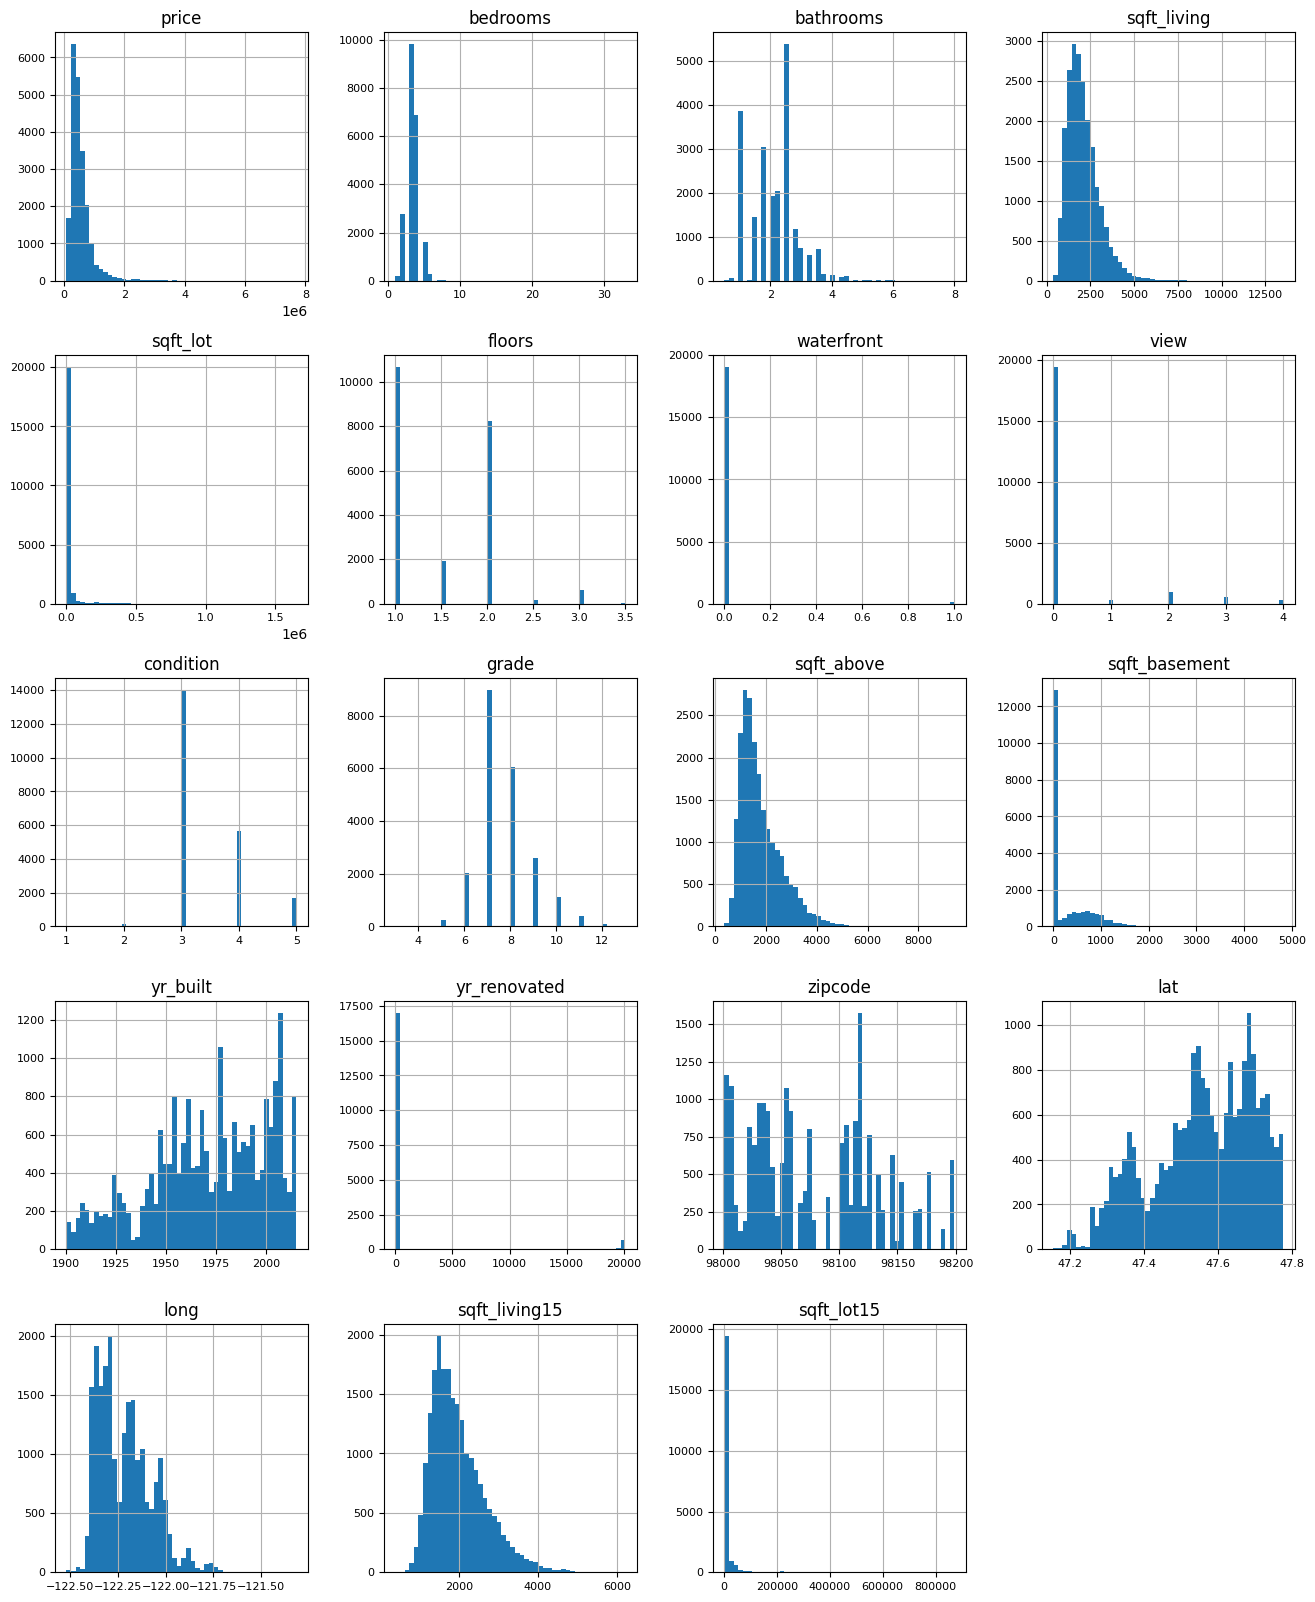

In [123]:
#plot all
list(set(df_eda.dtypes.tolist()))
df_num = df_eda.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop(columns=['id','house_id','id.1'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


# Initial considerations:

* What means high budget? --> at least over 3rd quartile
* What means show off? --> don't care too much about bedrooms, sqm, etc. --> only thing important is --> sqm lot largest vs sqm lot15
* Waterfront = 1
* Renovated = yes, and when?
* Built = when?
* What are high grades?
* What means reselling within a year?
* What to do with timing?


### Data Cleaning

In [124]:
# Checking for missing values
missing_values = df_eda.isnull().sum()

# Filter out missing values
missing_values = missing_values[missing_values > 0]

missing_values

display(df_eda['view'].head(100))
# waterfront       2391 --> set to 0 for no waterfront
# view               63 --> set to 0 if no viewing has happend
# sqft_basement     452 --> set to 0 for no basement
# yr_renovated     3848 --> set to 0 for no renovation yet

# set all columns that need to be filled with zeros
columns_to_zero = ['waterfront', 'view', 'sqft_basement', 'yr_renovated']
df_eda[columns_to_zero] = df_eda[columns_to_zero].fillna(0)

# double check

missing_values_check = df_eda.isnull().sum()
missing_values_check = missing_values_check[missing_values_check > 0]
missing_values_check

0    0.000
1    0.000
2    0.000
3    0.000
4    0.000
      ... 
95   0.000
96   0.000
97   0.000
98   0.000
99   2.000
Name: view, Length: 100, dtype: float64

Series([], dtype: int64)

In [135]:
#Check for duplicates
df_eda.duplicated().value_counts()

# --> no duplicates (False    21597)

False    21597
Name: count, dtype: int64

In [136]:
#Check data types
df_eda.dtypes

# --> date is object
df_eda.date.head(10)

# convert date to datetime
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y-%m-%d')

#double check
date_dtype = df_eda['date'].dtype
df_eda.date.dtype
df_eda.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1.000,0.000,0.000,...,0.000,98178,47.511,-122.257,109.626,524.902,109.626,0.000,124.490,524.902
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2.000,0.000,0.000,...,19910.000,98125,47.721,-122.319,238.761,672.804,201.600,37.161,157.006,709.686
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,1.000,0.000,0.000,...,0.000,98028,47.738,-122.233,71.535,929.030,71.535,0.000,252.696,748.984
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1.000,0.000,0.000,...,0.000,98136,47.521,-122.393,182.090,464.515,97.548,84.542,126.348,464.515
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1.000,0.000,0.000,...,0.000,98074,47.617,-122.045,156.077,750.656,156.077,0.000,167.225,697.051


In [137]:
#Convert sqfeet to sqm

conversion_f = 0.092903
#display(df_eda.head(),df_eda_backup.head())
#Conversion of living and lot to sqm
df_eda['sqm_living'] = df_eda['sqft_living'] * conversion_f
df_eda['sqm_lot'] = df_eda['sqft_lot'] * conversion_f
df_eda['sqm_above'] = df_eda['sqft_above'] * conversion_f
df_eda['sqm_basement'] = df_eda['sqft_basement'] * conversion_f
df_eda['sqm_living15'] = df_eda['sqft_living15'] * conversion_f
df_eda['sqm_lot15'] = df_eda['sqft_lot15'] * conversion_f

#double check
df_eda[['sqft_living', 'sqm_living', 'sqft_lot', 'sqm_lot']].head()

#drop sqft columns
df_eda.drop(columns=['sqft_living', 'sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15'], inplace=True)
#display(df_eda.head(),df_eda_backup.head())




KeyError: 'sqft_living'

In [138]:
# import missingno
import missingno as msno

# display number of missing values per column
df_eda.isna().sum()

date            0
price           0
house_id        0
id              0
id.1            0
bedrooms        0
bathrooms       0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
sqm_living      0
sqm_lot         0
sqm_above       0
sqm_basement    0
sqm_living15    0
sqm_lot15       0
dtype: int64

In [185]:
#only Waterfront, renovated
df_w = df_eda.query('waterfront == 1 ')
df_wnr = df_eda.query('waterfront == 1 & yr_renovated < 1')
display(df_w.info())

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 49 to 21560
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          146 non-null    datetime64[ns]
 1   price         146 non-null    float64       
 2   house_id      146 non-null    int64         
 3   id            146 non-null    int64         
 4   id.1          146 non-null    int64         
 5   bedrooms      146 non-null    float64       
 6   bathrooms     146 non-null    float64       
 7   floors        146 non-null    float64       
 8   waterfront    146 non-null    float64       
 9   view          146 non-null    float64       
 10  condition     146 non-null    int64         
 11  grade         146 non-null    int64         
 12  yr_built      146 non-null    int64         
 13  yr_renovated  146 non-null    float64       
 14  zipcode       146 non-null    int64         
 15  lat           146 non-null    float64     

None

### Data exploration

In [150]:
display(df_wnr.head(), df_wnr.info(), df_wnr.describe(), df_wnr.shape)


print(df_wnr['price'].describe())
plt.figure(figsize=(9, 8))
df_wnr.head()


<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 49 to 21560
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          146 non-null    datetime64[ns]
 1   price         146 non-null    float64       
 2   house_id      146 non-null    int64         
 3   id            146 non-null    int64         
 4   id.1          146 non-null    int64         
 5   bedrooms      146 non-null    float64       
 6   bathrooms     146 non-null    float64       
 7   floors        146 non-null    float64       
 8   waterfront    146 non-null    float64       
 9   view          146 non-null    float64       
 10  condition     146 non-null    int64         
 11  grade         146 non-null    int64         
 12  yr_built      146 non-null    int64         
 13  yr_renovated  146 non-null    float64       
 14  zipcode       146 non-null    int64         
 15  lat           146 non-null    float64     

,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
49,2015-03-11,1350000.000,822039084,50,822039084,3.000,2.500,1.000,1.000,2.000,...,0.000,98070,47.404,-122.451,255.762,6039.160,201.135,54.627,248.980,6736.675
230,2015-04-13,655000.000,8096000060,231,8096000060,2.000,1.750,2.000,1.000,4.000,...,19780.000,98166,47.450,-122.375,134.709,1467.682,114.271,20.439,188.593,1225.669
246,2014-09-29,2400000.000,2025069065,247,2025069065,4.000,2.500,1.000,1.000,4.000,...,0.000,98074,47.634,-122.072,339.096,776.112,170.012,169.083,289.857,1750.385
264,2014-10-27,369900.000,2123039032,265,2123039032,1.000,0.750,1.000,1.000,4.000,...,0.000,98070,47.468,-122.438,70.606,936.369,70.606,0.000,114.271,1325.447
300,2014-06-24,3080000.000,3225069065,301,3225069065,4.000,5.000,1.000,1.000,4.000,...,0.000,98074,47.605,-122.077,422.709,1731.805,241.548,181.161,422.709,1812.352


None

,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
count,146,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,...,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000
mean,2014-10-29 16:16:26.301369856,1717214.726,4454968693.048,10216.966,4454968693.048,3.349,2.709,1.630,1.000,3.760,...,3950.137,98096.712,47.540,-122.278,301.447,2403.483,233.071,67.676,249.243,2126.893
min,2014-05-08 00:00:00,285000.000,121029034.000,50.000,121029034.000,1.000,0.750,1.000,1.000,0.000,...,0.000,98004.000,47.328,-122.514,40.877,184.784,40.877,0.000,69.677,300.077
25%,2014-07-23 06:00:00,827500.000,2016368797.000,4235.750,2016368797.000,3.000,1.812,1.000,1.000,4.000,...,0.000,98040.000,47.453,-122.376,193.470,1086.245,145.393,0.000,192.774,1114.046
50%,2014-10-25 00:00:00,1510000.000,3692779634.000,10642.000,3692779634.000,3.000,2.500,2.000,1.000,4.000,...,0.000,98075.000,47.548,-122.273,269.419,1647.217,204.387,49.703,250.374,1510.649
75%,2015-01-27 18:00:00,2282500.000,7390450150.000,15778.750,7390450150.000,4.000,3.250,2.000,1.000,4.000,...,0.000,98155.000,47.608,-122.210,382.528,2479.813,299.148,117.522,291.715,2279.607
max,2015-05-11 00:00:00,7060000.000,9808700762.000,21561.000,9808700762.000,6.000,6.750,3.000,1.000,4.000,...,20090.000,98199.000,47.773,-122.059,932.746,46931.437,713.495,447.792,456.432,17862.274
std,NaN,1145384.857,2858044756.510,6427.840,2858044756.510,1.099,1.122,0.548,0.000,0.636,...,7961.740,60.600,0.114,0.124,153.488,4146.175,119.261,75.067,75.104,2161.303


(146, 23)

count       146.000
mean    1717214.726
std     1145384.857
min      285000.000
25%      827500.000
50%     1510000.000
75%     2282500.000
max     7060000.000
Name: price, dtype: float64


,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
49,2015-03-11,1350000.000,822039084,50,822039084,3.000,2.500,1.000,1.000,2.000,...,0.000,98070,47.404,-122.451,255.762,6039.160,201.135,54.627,248.980,6736.675
230,2015-04-13,655000.000,8096000060,231,8096000060,2.000,1.750,2.000,1.000,4.000,...,19780.000,98166,47.450,-122.375,134.709,1467.682,114.271,20.439,188.593,1225.669
246,2014-09-29,2400000.000,2025069065,247,2025069065,4.000,2.500,1.000,1.000,4.000,...,0.000,98074,47.634,-122.072,339.096,776.112,170.012,169.083,289.857,1750.385
264,2014-10-27,369900.000,2123039032,265,2123039032,1.000,0.750,1.000,1.000,4.000,...,0.000,98070,47.468,-122.438,70.606,936.369,70.606,0.000,114.271,1325.447
300,2014-06-24,3080000.000,3225069065,301,3225069065,4.000,5.000,1.000,1.000,4.000,...,0.000,98074,47.605,-122.077,422.709,1731.805,241.548,181.161,422.709,1812.352


<Figure size 900x800 with 0 Axes>

# Initial considerations:

* What means high budget? --> at least over 3rd quartile
* What means show off? --> don't care too much about bedrooms, sqm, etc. --> only thing important is --> sqm lot largest vs sqm lot15
* Waterfront = 1
* Renovated = yes, and when?
* Built = when?
* What are high grades?
* What means reselling within a year --> likes an area where prices are comparably high for similar houses

# Assumptions


* **Budget: --> 0.9 Quantile --> 880k +-150k**
* **Waterfront = 1**
* **Renovated = 1, tbd**
* **Grades --> 0.9 Quantile --> >= 9**
* **Condition --> 0.9 Quantile --> >= 4**
* **Show off -->**

## Recommendations

* Adjust search pattern, not only to renovated house (correlation renovated to grade) - Check
* What are designated ares to look for (good for show off, few water front houses, area filled with expensive houses)
* 5 objects to choose from (how do prices compare to houses in the area of similar size with no waterfront)


,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
49,2015-03-11,1350000.000,822039084,50,822039084,3.000,2.500,1.000,1.000,2.000,...,0.000,98070,47.404,-122.451,255.762,6039.160,201.135,54.627,248.980,6736.675
246,2014-09-29,2400000.000,2025069065,247,2025069065,4.000,2.500,1.000,1.000,4.000,...,0.000,98074,47.634,-122.072,339.096,776.112,170.012,169.083,289.857,1750.385
264,2014-10-27,369900.000,2123039032,265,2123039032,1.000,0.750,1.000,1.000,4.000,...,0.000,98070,47.468,-122.438,70.606,936.369,70.606,0.000,114.271,1325.447
300,2014-06-24,3080000.000,3225069065,301,3225069065,4.000,5.000,1.000,1.000,4.000,...,0.000,98074,47.605,-122.077,422.709,1731.805,241.548,181.161,422.709,1812.352
457,2014-11-26,705000.000,2122039094,458,2122039094,3.000,3.000,2.000,1.000,3.000,...,0.000,98070,47.384,-122.438,183.019,1948.919,164.438,18.581,211.819,7004.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2015-03-17,1900000.000,2025069140,19969,2025069140,3.000,2.500,3.000,1.000,4.000,...,0.000,98074,47.632,-122.071,262.915,402.642,262.915,0.000,262.915,3549.917
20309,2014-08-11,3000000.000,518500480,20310,518500480,3.000,3.500,2.000,1.000,4.000,...,0.000,98056,47.528,-122.205,409.702,999.265,318.657,91.045,329.806,523.416
20751,2015-04-17,2300000.000,8043700105,20752,8043700105,4.000,4.000,2.500,1.000,4.000,...,0.000,98008,47.572,-122.104,405.057,759.482,366.038,39.019,248.051,791.998
21185,2014-10-08,2230000.000,518500460,21186,518500460,3.000,3.500,2.000,1.000,4.000,...,0.000,98056,47.529,-122.205,349.315,523.416,262.915,86.400,330.735,535.307


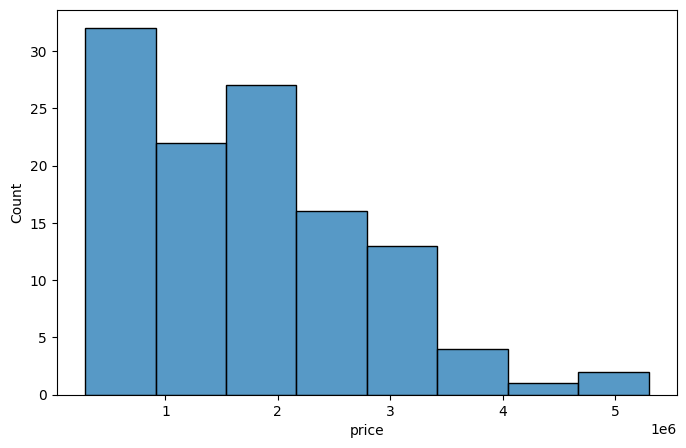

In [186]:
#Assumption --> renovation equals newly built we take all renovated waterfront buildings and add all buildings that were built after the latest renovation
#price distribution
sns.histplot(data=df_wnr,x='price')

df_wnr.price.median()
df_wnr.price.mean()
df_wnr.price.quantile(0.9)
df_wnr.head(200)


4.0

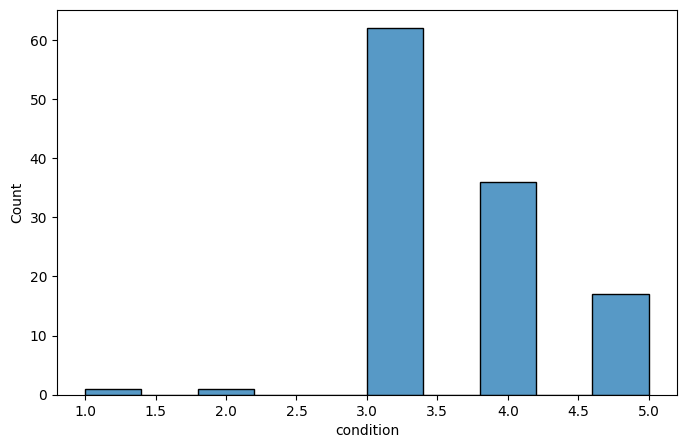

In [187]:
#condition distribution
sns.histplot(data=df_wnr,x='condition')
df_eda.condition.quantile(0.9)

11.0

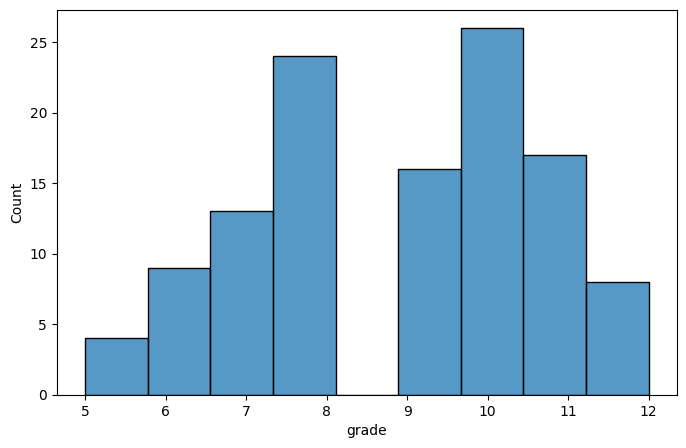

In [188]:
#grade distribution
sns.histplot(data=df_wnr,x='grade',legend=4)
df_w.grade.quantile(0.9)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqm_living'}>,
        <Axes: title={'center': 'sqm_lot'}>,
        <Axes: title={'center': 'sqm_above'}>],
       [<Axes: title={'center': 'sqm_basement'}>,
        <Axes: title={'center': 'sqm_living15'}>,
        <Axes: title={'center': 'sqm_lot15'}>, <Axes: >]], dtype=object)

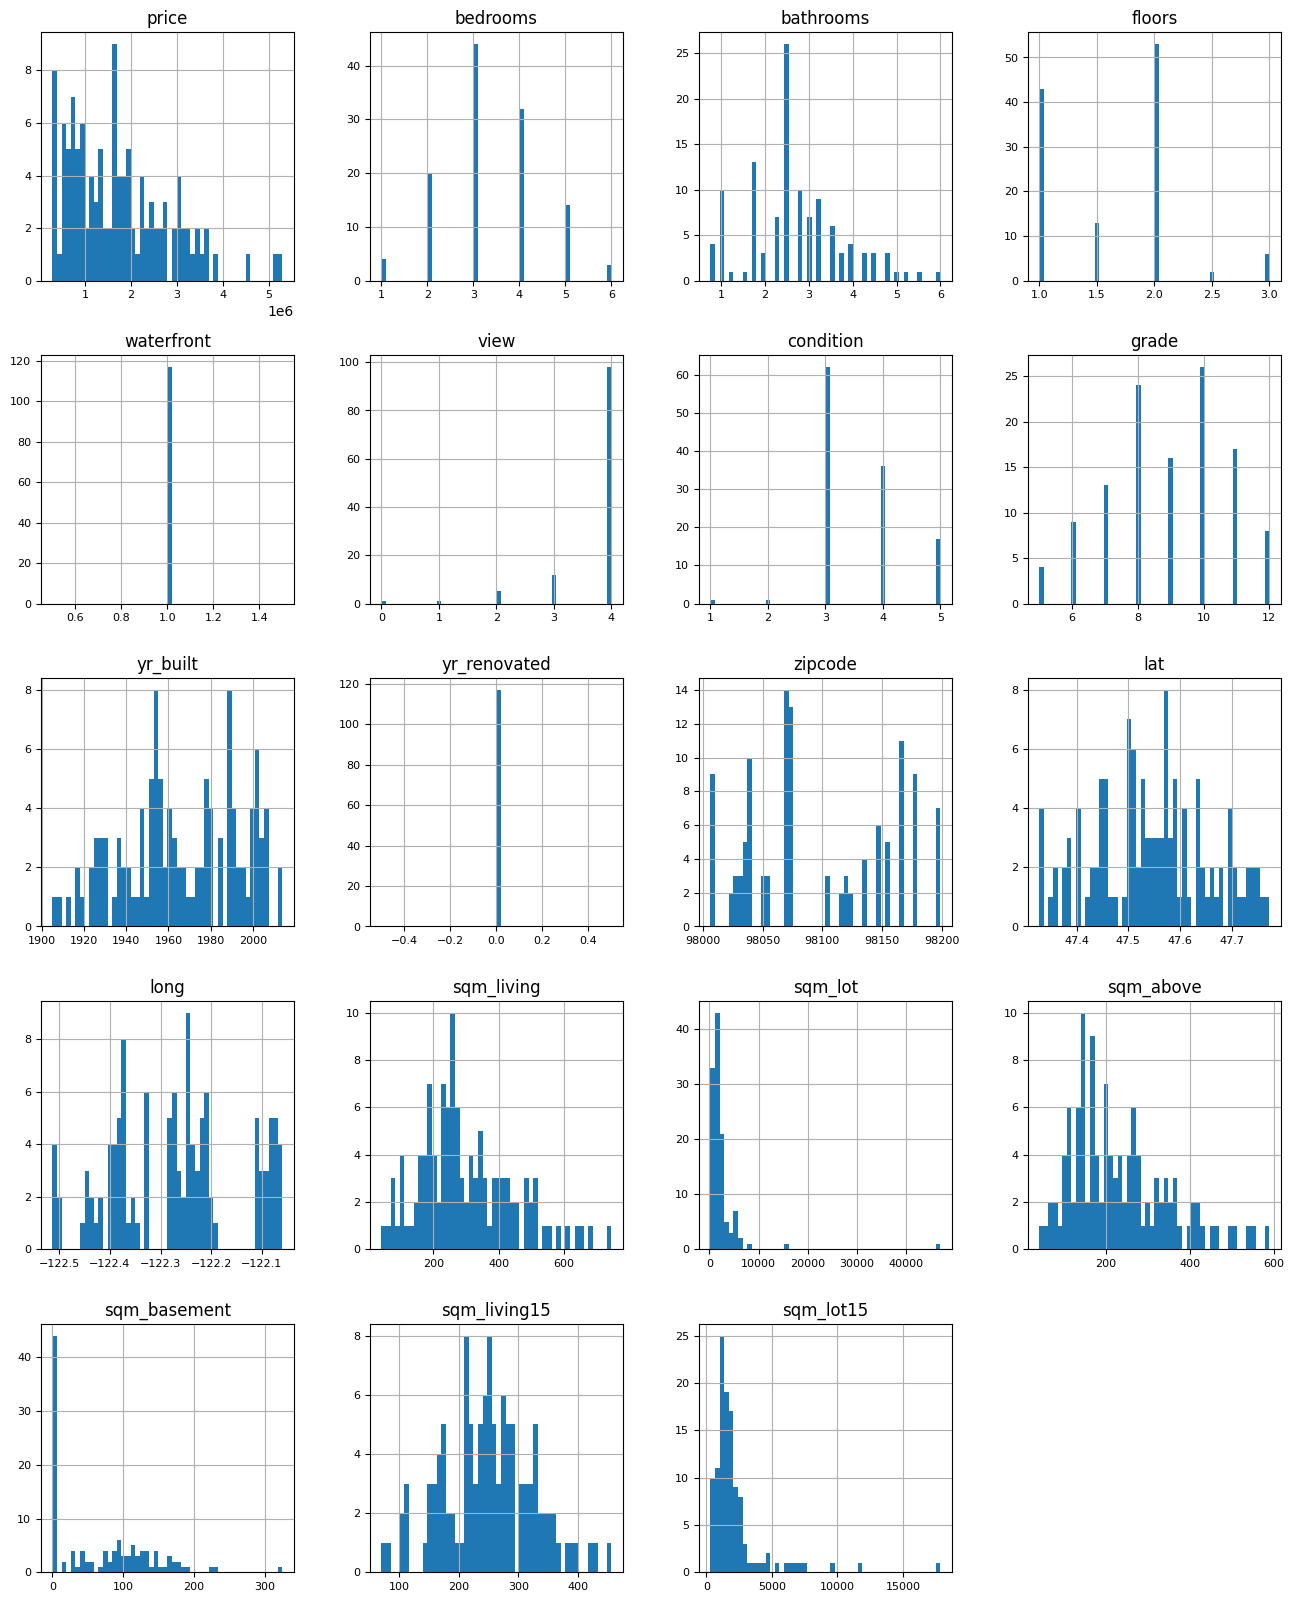

In [189]:
#plot all
list(set(df_wnr.dtypes.tolist()))
df_num = df_wnr.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop(columns=['id','house_id','id.1'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [163]:
#Plotly
# plot all locations for possible waterfront buildings

fig = px.scatter_mapbox(df_wnr, lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#hover_name="price", hover_data=["price",'built'],

In [190]:
df_wnr.grade.mean()
df_wnr.condition.max()
df_wnr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 49 to 21560
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          117 non-null    datetime64[ns]
 1   price         117 non-null    float64       
 2   house_id      117 non-null    int64         
 3   id            117 non-null    int64         
 4   id.1          117 non-null    int64         
 5   bedrooms      117 non-null    float64       
 6   bathrooms     117 non-null    float64       
 7   floors        117 non-null    float64       
 8   waterfront    117 non-null    float64       
 9   view          117 non-null    float64       
 10  condition     117 non-null    int64         
 11  grade         117 non-null    int64         
 12  yr_built      117 non-null    int64         
 13  yr_renovated  117 non-null    float64       
 14  zipcode       117 non-null    int64         
 15  lat           117 non-null    float64     

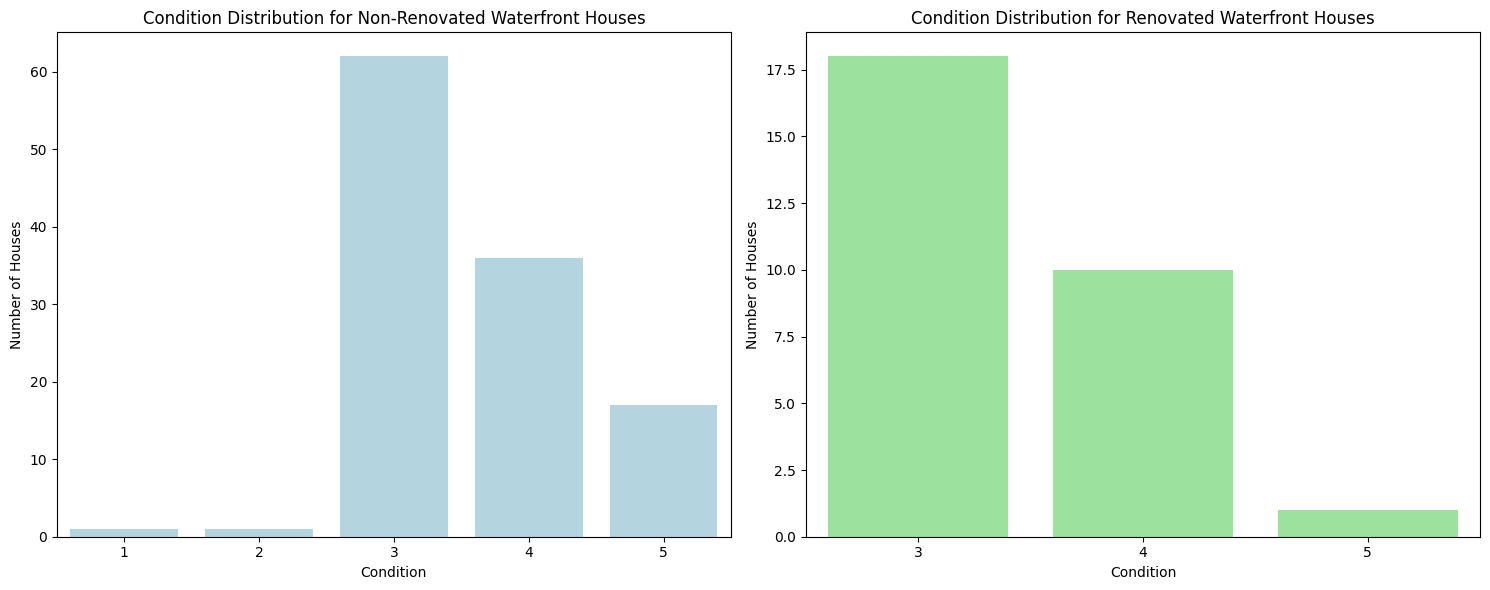

In [191]:
# Plotting pairplot to show that we can add the renovated houses  the relationships of renovation, condition and built year

non_renovated_waterfront = df_w[df_w['yr_renovated'] == 0]
renovated_waterfront = df_w[df_w['yr_renovated'] > 0]

plt.figure(figsize=(15, 6))

# Condition of Non-Renovated Waterfront Houses
plt.subplot(1, 2, 1)
sns.countplot(x='condition', data=non_renovated_waterfront, color='lightblue')
plt.title('Condition Distribution for Non-Renovated Waterfront Houses')
plt.xlabel('Condition')
plt.ylabel('Number of Houses')

# Condition of Renovated Waterfront Houses
plt.subplot(1, 2, 2)
sns.countplot(x='condition', data=renovated_waterfront, color='lightgreen')
plt.title('Condition Distribution for Renovated Waterfront Houses')
plt.xlabel('Condition')
plt.ylabel('Number of Houses')

plt.tight_layout()
plt.show()

#### While both renovated and non-renovated waterfront houses have a similar distribution around 3 and 4, renovated houses have a higher tendency to be in condition 5
#### To increase dataset we will look at all waterfront houses overall

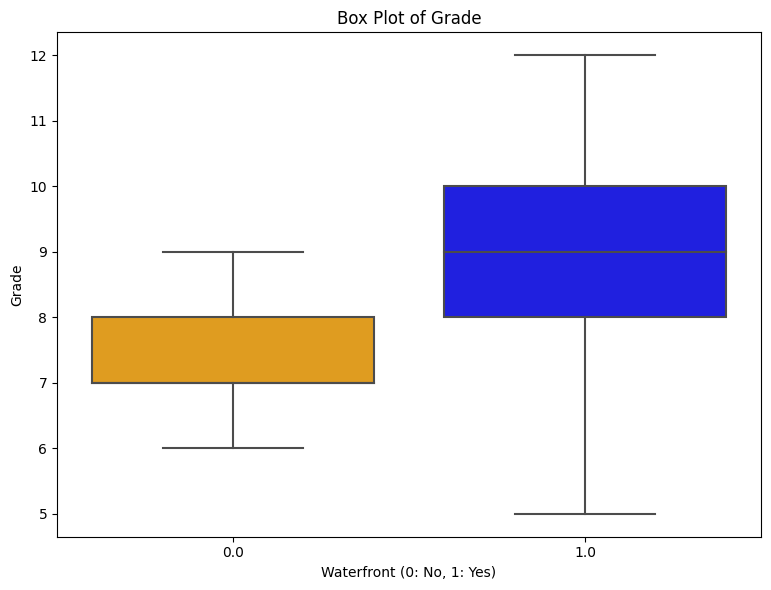

,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1.000,0.000,0.000,...,0.000,98178,47.511,-122.257,109.626,524.902,109.626,0.000,124.490,524.902
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2.000,0.000,0.000,...,19910.000,98125,47.721,-122.319,238.761,672.804,201.600,37.161,157.006,709.686
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,1.000,0.000,0.000,...,0.000,98028,47.738,-122.233,71.535,929.030,71.535,0.000,252.696,748.984
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1.000,0.000,0.000,...,0.000,98136,47.521,-122.393,182.090,464.515,97.548,84.542,126.348,464.515
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1.000,0.000,0.000,...,0.000,98074,47.617,-122.045,156.077,750.656,156.077,0.000,167.225,697.051


In [193]:
# plotting to analyze condition for houses with yr_built = yr_renovated
# showing that waterfront houses in general have higher grade than the rest of the data

plt.figure(figsize=(15, 6))

#Grade
plt.subplot(1, 2, 1)
sns.boxplot(x=df_eda['waterfront'], y=df_eda['grade'], palette=['orange', 'blue'],showfliers=False)
plt.title('Box Plot of Grade')
plt.xlabel('Waterfront (0: No, 1: Yes)')
plt.ylabel('Grade')


plt.tight_layout()
plt.show()
df_eda.head()

#### Waterfront houses in general have a significantly higher grade than the rest of the houses so we do not need to further filter the available objects for grade

In [238]:
# Identify the best areas to own a waterfront house to show off --> sqm of lot is larger than the average sqm lot in the same zipcode

# groupy zipcode and calculate average lot sizes for all houses
group_zip = df_eda.groupby(['zipcode','waterfront']).agg({'sqm_living':'mean','sqm_lot':'mean'}).unstack()

# filter for areas where lot sizes at waterfront are larger
interesting_areas = group_zip[(group_zip[('sqm_living', 1.0)] > group_zip[('sqm_living', 0.0)]) & 
                           (group_zip[('sqm_lot', 1.0)] > group_zip[('sqm_lot', 0.0)])]

interesting_areas.columns = ['living_non_water','living_water','lot_non_water','lot_water']
interesting_areas
# filter by zipcode to find where difference of sqm for waterfront and non waterfront is the largest

interesting_areas['waterfront_larger_lot'] = interesting_areas['lot_water']-interesting_areas['lot_non_water']
interesting_areas_sorted = interesting_areas.sort_values(by='waterfront_larger_lot',ascending=False)
interesting_areas_sorted = interesting_areas_sorted.reset_index('zipcode')
interesting_areas_sorted

,zipcode,living_non_water,living_water,lot_non_water,lot_water,waterfront_larger_lot
0,98023,184.556,233.806,950.901,4579.127,3628.226
1,98118,155.745,357.986,519.572,3464.353,2944.781
2,98033,219.106,525.521,955.590,3737.240,2781.650
3,98004,268.160,932.746,1210.301,3467.604,2257.304
4,98199,200.509,304.722,498.087,2704.499,2206.412
5,98116,172.004,231.328,456.187,2573.599,2117.412
6,98034,182.193,359.906,891.314,2715.740,1824.427
7,98105,196.417,454.296,452.867,2201.244,1748.376
8,98136,159.126,227.612,523.560,2218.096,1694.536
9,98146,149.076,224.051,802.984,2484.102,1681.118


In [240]:
interesting_areas_sorted.to_csv('interesting_areas_sorted.csv')
interesting_areas_sorted

,zipcode,living_non_water,living_water,lot_non_water,lot_water,waterfront_larger_lot
0,98023,184.556,233.806,950.901,4579.127,3628.226
1,98118,155.745,357.986,519.572,3464.353,2944.781
2,98033,219.106,525.521,955.590,3737.240,2781.650
3,98004,268.160,932.746,1210.301,3467.604,2257.304
4,98199,200.509,304.722,498.087,2704.499,2206.412
5,98116,172.004,231.328,456.187,2573.599,2117.412
6,98034,182.193,359.906,891.314,2715.740,1824.427
7,98105,196.417,454.296,452.867,2201.244,1748.376
8,98136,159.126,227.612,523.560,2218.096,1694.536
9,98146,149.076,224.051,802.984,2484.102,1681.118


In [259]:
# highlight the preferred zipcodes
preferred_zipcodes = interesting_areas_sorted['zipcode'].head(10)
preferred_zipcodes_list = preferred_zipcodes.tolist()
interesting_areas_sorted['preferred_areas'] = interesting_areas_sorted['zipcode'].apply(lambda x: 'Preferred' if x in preferred_zipcodes_list else 'Other')
interesting_areas_sorted

,zipcode,living_non_water,living_water,lot_non_water,lot_water,waterfront_larger_lot,preferred_areas
0,98023,184.556,233.806,950.901,4579.127,3628.226,Preferred
1,98118,155.745,357.986,519.572,3464.353,2944.781,Preferred
2,98033,219.106,525.521,955.590,3737.240,2781.650,Preferred
3,98004,268.160,932.746,1210.301,3467.604,2257.304,Preferred
4,98199,200.509,304.722,498.087,2704.499,2206.412,Preferred
5,98116,172.004,231.328,456.187,2573.599,2117.412,Preferred
6,98034,182.193,359.906,891.314,2715.740,1824.427,Preferred
7,98105,196.417,454.296,452.867,2201.244,1748.376,Preferred
8,98136,159.126,227.612,523.560,2218.096,1694.536,Preferred
9,98146,149.076,224.051,802.984,2484.102,1681.118,Preferred


In [265]:
#plot the zipcodes where waterfront houses have on average a larger lot size compared to other ones in the area

avg_latitude = df_eda['lat'].mean()
avg_longitude = df_eda['long'].mean()
import geojson
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(interesting_areas_sorted, 
                           geojson=url_geojson, 
                           locations='zipcode', 
                           color='preferred_areas',
                           category_orders={"preferred_areas": ["Preferred", "Other"]},
                           mapbox_style="carto-positron",
                           zoom=8, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           labels={'preferred_areas':'Zip Code Preference'},
                           height=800,
                           width=1000, 
                          )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [278]:
# plot all waterfront objects within the top 10 interesting zipcodes
top_interesting_areas_sorted = interesting_areas_sorted['zipcode'].head(10).tolist()
top_waterfront_objects = df_w.query('zipcode in @top_interesting_areas_sorted')

fig = px.scatter_mapbox(top_waterfront_objects, lat="lat", lon="long", color_discrete_sequence=["green"], zoom=3, height=400, width= 600, hover_data='price')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

top_waterfront_objects.describe()

,date,price,house_id,id,id.1,bedrooms,bathrooms,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqm_living,sqm_lot,sqm_above,sqm_basement,sqm_living15,sqm_lot15
count,31,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,...,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,2014-10-30 15:29:01.935483904,2084353.226,4635299864.387,10249.548,4635299864.387,3.710,2.887,1.613,1.000,3.806,...,1932.903,98092.968,47.572,-122.319,337.598,2911.787,260.128,75.671,264.624,2301.288
min,2014-05-13 00:00:00,503000.000,121039083.000,657.000,121039083.000,2.000,1.000,1.000,1.000,2.000,...,0.000,98004.000,47.328,-122.416,93.832,184.784,93.832,0.000,157.935,300.077
25%,2014-07-27 00:00:00,1155000.000,1935824598.000,5401.000,1935824598.000,3.000,2.500,1.000,1.000,4.000,...,0.000,98034.000,47.503,-122.388,231.328,1705.931,157.006,0.000,233.651,1434.980
50%,2014-10-20 00:00:00,1660000.000,4217402115.000,10455.000,4217402115.000,4.000,2.750,2.000,1.000,4.000,...,0.000,98116.000,47.550,-122.364,300.077,2366.239,220.180,80.826,252.696,1957.838
75%,2015-02-18 12:00:00,2925000.000,7119651556.500,15059.500,7119651556.500,4.000,3.375,2.000,1.000,4.000,...,0.000,98136.000,47.673,-122.251,405.057,3848.135,325.625,135.174,314.941,2513.212
max,2015-04-21 00:00:00,7060000.000,9808700762.000,19585.000,9808700762.000,6.000,5.250,2.000,1.000,4.000,...,20010.000,98199.000,47.717,-122.211,932.746,8517.440,713.495,219.251,384.618,6710.291
std,NaN,1432094.789,2992007656.662,5687.892,2992007656.662,1.101,0.940,0.460,0.000,0.543,...,6002.738,55.075,0.113,0.075,173.009,1906.262,137.326,68.693,60.147,1423.017


#### These are the top 10 areas we should focus our search on as it is best to show off the size of your property.
**Lets now move into which area might be the best to create a large ROI in only a short period of time**